# <center> Data Mining & Analysing misdemeanours and crimes recorded by the french police and gendarmerie since 1996 </center>

**Auteur / Autor** : *Gaspard Jeannerot* <br>
**Temps de réalisation** :<br>
- x pour la récupération des jeux de données<br>
- XXX pour les transformations<br>
- x pour la visualisation<br>
- x pour la mise en forme<br>

**Objectif / Aim** : <br>
L'objectif de ce document est d'exploiter des données gouvernementales afin de montrer des tendances, et/ou des évolutions potentiels concernant les crimes et les délits en France. Puis de développer un algorithme pour permettre de prévoir l'apparition des crimes en France.


# <center>Préambule</center>
Après avoir visioné plusieurs vidéos (first, second) concernant la crise des migrants en Europe, j'ai pris conscience que le monde dans lequel nous vivions pouvait très rapidement évolué. Pire, en essayant de chercher à comprendre ce phénomène, en essayant de trouver des causes et des raisons, j'ai rapidement compris qu'un indivu comme moi, était incapable, à mon échelle de pouvoir, agir afin d'arranger les choses.


https://youtu.be/RBQ-IoHfimQ
https://youtu.be/nKDgFCojiT8

Etant un étudiant appréciant une vie stable, j'ai essayé de déterminer si cette situation pouvait un jour m'arrivé. Puis en essayant de prendre du recul sur cette situation, une question m'est venu à l'esprit : **Suis en danger là où j'habite ?** 

Afin d'apporter des éléments de réponses concrètes, j'ai essayé de chercher quels pouvaient être les facteurs pouvant me mener à une situation ou à un environnement dangereux. Mais avant cela, il m'a fallut comprendre avoir une définition exacte de ce que pouvait être le ***danger***. Dans cette situation, je le définis comme étant tous les actes humains volontaires métant en péril la surêté (stabilité) et pouvant entrainer ou exposer mes proches, mon entourage, à des conséquences préjudiciables.

Afin de pouvoir factuellement mesurer ce "danger", j'ai réfléchi à comment mesuré à mon échelle les actes pouvant être nuisible. Pour cela, j'ai cherché et trouvé des jeux de données pour m'aider à définir si oui ou non, là où je vis, est une zone à risque, dite dangereuse ou non. 

# <center>Table des matières</center>
[1. Préparation des données pour l'analyse](#section1)<br>
&emsp; [1.1. Importations des outils](#section1.1) <br>
&emsp; [1.2. Importations du Jeu de donnée](#section1.2) <br>
&emsp; [1.3. Transposition des données](#section1.3) <br>
&emsp; [1.4. Gestion multiples des feuilles](#section1.4) <br>
&emsp; [1.5. Récupération du champs date](#section1.5) <br>
&emsp; [1.6. Fixation des types de données](#section1.6) <br>
&emsp; [1.7. Colonnes inutilisées](#section1.7) <br>
[2. Analyse macro du jeu de données](#section2) <br>
&emsp; [2.1. Description élémentaire](#section2.1) <br>
&emsp; [2.2. Analyse focalisée](#section2.2) <br>

<a id='section1'></a>
## 1. Préparation des données pour l'analyse / Preparing the data for analysis
Source : <br>
Estimation de la population INSEE https://www.insee.fr/fr/statistiques/1893198 <br>
Source document : https://www.insee.fr/fr/statistiques/fichier/1893198/estim-pop-dep-sexe-gca-1975-2020.xls

Crimes et délits enregistrés en France https://www.data.gouv.fr/fr/datasets/chiffres-departementaux-mensuels-relatifs-aux-crimes-et-delits-enregistres-par-les-services-de-police-et-de-gendarmerie-depuis-janvier-1996/ <br>


<a id='section1.1'></a>
### *1.1. Importations des outils / Tools import*

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)

<a id='section1.2'></a>
### *1.2. Importations du Jeu de donnée / DataSet import*

In [2]:
### Generique variables definition to import
source = 'source/'
xl_misdemeanours_crimes_path = source + 'tableaux-4001-ts.xlsx'
xl_population_path = source + 'estim-pop-dep-sexe-gca-1975-2020.xls'


### Excel file import
crime_xl_data = pd.ExcelFile(xl_misdemeanours_crimes_path)
population_xl_data = pd.ExcelFile(xl_population_path)

### Get a look on sheet pages in the excel
print(crime_xl_data.sheet_names)

['France_Entière', 'France_Métro', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2A', '2B', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '971', '972', '973', '974', '975', '976', '977', '978', '986', '987', '988']


Le jeu de donnée est composé de plusieurs pages qui peuvent être traité de manière indépendantes. Pour l'instant, nous allons nous intéresser uniquement à la feuille "France métropolitaine".

In [3]:
# Define France metropolitaine
current_sheet = crime_xl_data.sheet_names[1]

# Read one sheet to begin ('France_Métro') --> libellée index to write minus two lines
df = pd.read_excel(crime_xl_data, current_sheet, index_col = 'libellé index')

# Examine the head of the DataFrame
df.head(3)

,Index,2020_01,2019_12,2019_11,2019_10,2019_09,2019_08,2019_07,2019_06,2019_05,...,1996_10,1996_09,1996_08,1996_07,1996_06,1996_05,1996_04,1996_03,1996_02,1996_01
libellé index,,,,,,,,,,,,,,,,,,,,,
Règlements de compte entre malfaireurs,1,8,5,5,4,12,6,16,7,5,...,4,7,9,10,7,5,6,8,7,8
Homicides pour voler et à l'occasion de vols,2,1,3,0,0,3,0,3,1,1,...,9,11,7,16,12,6,13,10,11,12
Homicides pour d'autres motifs,3,52,66,70,75,64,57,68,53,53,...,72,56,62,90,99,68,72,75,55,69


Le jeu de donnée possède des données temporelles en tant que dimensions. Cette situation nous ne permet d'analyser avec aisance les actes criminels. Afin de rendre ces données plus exploitable, nous allons opérer à une transformation de transposition. De plus afin de pouvoir faciliter la visualisation de nos prochains graphiques, nous allons aussi en profiter pour dissocier le champs date en années et mois.

<a id='section1.3'></a>
### *1.3. Transposition des données  / Transpose Data and get date values*

In [4]:
# Drop init 'index' columns, and Transpose Data
df = df.drop(columns=['Index'])
df = df.T
df.head()

libellé index,Règlements de compte entre malfaireurs,Homicides pour voler et à l'occasion de vols,Homicides pour d'autres motifs,Tentatives d'homicides pour voler et à l'occasion de vols,Tentatives homicides pour d'autres motifs,Coups et blessures volontaires suivis de mort,Autres coups et blessures volontaires criminels ou correctionnels,Prises d'otages à l'occasion de vols,Prises d'otages dans un autre but,Sequestrations,...,"Banqueroutes, abus de biens sociaux et autres délits de société",Index non utilisé,Index non utilisé,"Prix illicittes, publicité fausse et infractions aux règles de la concurrence",Achats et ventes sans factures,Infractions à l'exercice d'une profession règlementée,Infractions au droit de l'urbanisme et de la construction,Fraudes fiscales,Autres délits économiques et financiers,Autres délits
2020_01,8,1,52,12,249,15,23468,12,9,358,...,142,0,0,55,3,108,350,62,1271,12256
2019_12,5,3,66,12,224,9,22783,6,10,357,...,137,0,0,57,8,109,348,63,810,11258
2019_11,5,0,70,3,215,14,23105,4,13,385,...,144,0,0,70,9,145,361,65,1030,11741
2019_10,4,0,75,6,196,14,24187,6,9,378,...,121,0,0,82,11,186,419,72,1410,13025
2019_09,12,3,64,6,237,16,24222,8,7,356,...,122,0,0,55,9,137,364,70,1259,11901


Une fois les données transposées, nous pouvons facilement nous rendre compte que nous avons un problème de typage concernant l'index. Elle n'est pas considéré comme une type datetime. Corrigeons cela. Cependant il va falloir avant s'assurer que l'intégralité puisse aussi prendre en compte ces modifications là.

<a id='section1.4'></a>
### *1.4. Gestion multiples des feuilles xl crime*

In [5]:
df_all = pd.DataFrame(columns=df.columns.values)
df_all['departement'] = np.nan

all_name_sheet = (
    ['01','02','03','04','05','06','07','08','09'] 
    + list(range(10,20)) 
    + ['2A','2B']
    + list(range(21,96))
    + ['971', '972', '973', '974', '975', '976', '977', '978', '986', '987', '988']
)

for i in all_name_sheet:
    df_tmp = pd.read_excel(crime_xl_data, sheet_name=str(i), index_col = 'libellé index')
    df_tmp = df_tmp.drop(columns=['Index'])
    df_tmp = df_tmp.T
    df_tmp['departement'] = str(i)
    df_all = df_all.append(df_tmp)

df_all.head()

libellé index,Règlements de compte entre malfaireurs,Homicides pour voler et à l'occasion de vols,Homicides pour d'autres motifs,Tentatives d'homicides pour voler et à l'occasion de vols,Tentatives homicides pour d'autres motifs,Coups et blessures volontaires suivis de mort,Autres coups et blessures volontaires criminels ou correctionnels,Prises d'otages à l'occasion de vols,Prises d'otages dans un autre but,Sequestrations,...,Index non utilisé,Index non utilisé,"Prix illicittes, publicité fausse et infractions aux règles de la concurrence",Achats et ventes sans factures,Infractions à l'exercice d'une profession règlementée,Infractions au droit de l'urbanisme et de la construction,Fraudes fiscales,Autres délits économiques et financiers,Autres délits,departement
2020_01,0,0,0,0,0,0,134,0,0,1,...,0,0,0,0,0,4,0,1,80,01
2019_12,0,0,0,0,2,0,138,0,0,1,...,0,0,0,0,3,6,0,1,62,01
2019_11,0,0,1,0,0,0,135,0,0,4,...,0,0,1,0,1,2,0,2,67,01
2019_10,0,0,0,0,0,1,155,0,0,2,...,0,0,0,0,0,7,0,1,84,01
2019_09,0,0,1,0,0,0,174,0,0,1,...,0,0,0,0,0,8,0,0,86,01


<a id='section1.5'></a>
### *1.5. Récupération du champs date*

Mettons à jours l'index du jeu de donnée pour qu'il puisse correspondre au type Datetime. Cela permettra de faciliter sa visualisation plus tard

#### *1.5.1. Sur une feuille*

In [6]:
# Sur le jeu de donnée France métropolitaine
# Reset index, Get Year, Get Month
df = df.reset_index()
df['year'] = df['index'].astype(str).str[0:4]
df['month'] = df['index'].astype(str).str[5:7]

# Define new date column
combined = df.year.str.cat(df.month,sep=' ')
df['date'] = pd.to_datetime(combined)

# Drop 'index' column and set new index on date
df = df.drop(columns='index')
df = df.set_index('date')

df.head()

libellé index,Règlements de compte entre malfaireurs,Homicides pour voler et à l'occasion de vols,Homicides pour d'autres motifs,Tentatives d'homicides pour voler et à l'occasion de vols,Tentatives homicides pour d'autres motifs,Coups et blessures volontaires suivis de mort,Autres coups et blessures volontaires criminels ou correctionnels,Prises d'otages à l'occasion de vols,Prises d'otages dans un autre but,Sequestrations,...,Index non utilisé,"Prix illicittes, publicité fausse et infractions aux règles de la concurrence",Achats et ventes sans factures,Infractions à l'exercice d'une profession règlementée,Infractions au droit de l'urbanisme et de la construction,Fraudes fiscales,Autres délits économiques et financiers,Autres délits,year,month
date,,,,,,,,,,,,,,,,,,,,,
2020-01-01,8,1,52,12,249,15,23468,12,9,358,...,0,55,3,108,350,62,1271,12256,2020,01
2019-12-01,5,3,66,12,224,9,22783,6,10,357,...,0,57,8,109,348,63,810,11258,2019,12
2019-11-01,5,0,70,3,215,14,23105,4,13,385,...,0,70,9,145,361,65,1030,11741,2019,11
2019-10-01,4,0,75,6,196,14,24187,6,9,378,...,0,82,11,186,419,72,1410,13025,2019,10
2019-09-01,12,3,64,6,237,16,24222,8,7,356,...,0,55,9,137,364,70,1259,11901,2019,09


#### *1.5.2. Sur toutes les feuilles*

In [7]:
# Sur le jeu de donnée complet
# Reset index, Get Year, Get Month
df_all = df_all.reset_index()
df_all['year'] = df_all['index'].astype(str).str[0:4]
df_all['month'] = df_all['index'].astype(str).str[5:7]

# Define new date column
combined = df_all.year.str.cat(df_all.month,sep=' ')
df_all['date'] = pd.to_datetime(combined)

# Drop 'index' column and set new index on date
df_all = df_all.drop(columns='index')
df_all = df_all.set_index('date')

df_all.head()

libellé index,Règlements de compte entre malfaireurs,Homicides pour voler et à l'occasion de vols,Homicides pour d'autres motifs,Tentatives d'homicides pour voler et à l'occasion de vols,Tentatives homicides pour d'autres motifs,Coups et blessures volontaires suivis de mort,Autres coups et blessures volontaires criminels ou correctionnels,Prises d'otages à l'occasion de vols,Prises d'otages dans un autre but,Sequestrations,...,"Prix illicittes, publicité fausse et infractions aux règles de la concurrence",Achats et ventes sans factures,Infractions à l'exercice d'une profession règlementée,Infractions au droit de l'urbanisme et de la construction,Fraudes fiscales,Autres délits économiques et financiers,Autres délits,departement,year,month
date,,,,,,,,,,,,,,,,,,,,,
2020-01-01,0,0,0,0,0,0,134,0,0,1,...,0,0,0,4,0,1,80,01,2020,01
2019-12-01,0,0,0,0,2,0,138,0,0,1,...,0,0,3,6,0,1,62,01,2019,12
2019-11-01,0,0,1,0,0,0,135,0,0,4,...,1,0,1,2,0,2,67,01,2019,11
2019-10-01,0,0,0,0,0,1,155,0,0,2,...,0,0,0,7,0,1,84,01,2019,10
2019-09-01,0,0,1,0,0,0,174,0,0,1,...,0,0,0,8,0,0,86,01,2019,09


La champs date est maintenant l'index. Voyons maintenant les types de données.

<a id='section1.6'></a>
### *1.6. Fixation des types de données / Fixing a data type*

Regardons si plusieurs colones ne possèderait pas un typage non conventionnel ou potentiellement inaproprié pour notre analyse.

In [8]:
df.dtypes.values

array([dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
      

In [9]:
print(df.dtypes)

libellé index
Règlements de compte entre malfaireurs                                                       int64
Homicides pour voler et à l'occasion de vols                                                 int64
Homicides pour d'autres motifs                                                               int64
Tentatives d'homicides pour voler et à l'occasion de vols                                    int64
Tentatives homicides pour d'autres motifs                                                    int64
Coups et blessures volontaires suivis de mort                                                int64
Autres coups et blessures volontaires criminels ou correctionnels                            int64
Prises d'otages à l'occasion de vols                                                         int64
Prises d'otages dans un autre but                                                            int64
Sequestrations                                                                               in

Fixons les types des champs 'year' et 'month'

In [10]:
df.year = df.year.astype(str).astype(int)
df.month = df.month.astype(str)

En regardant de plus près nous pouvons constater que plusieurs colones se nomme 'index non utilisé', penchons nous dessus.

<a id='section1.7'></a>
### *1.7. Colonnes inutilisées*

In [11]:
# Define names of index and columns
df.index.names = ['index']
df.columns.names = ['libellé columns']

In [12]:
df['Index non utilisé'].sum()

libellé columns
Index non utilisé    0
Index non utilisé    2
Index non utilisé    0
Index non utilisé    0
dtype: int64

En visualisant ces résultats, nous pouvons constatés que ces dimensions nommées 'Index non utilisé' ne représente pas de grande quantité d'information. Aussi nous allons donc ne pas en tenir compte.

In [13]:
print(df.shape)
df_all = df_all.drop(columns='Index non utilisé')
df = df.drop(columns='Index non utilisé')
print(df.shape)

(289, 109)
(289, 105)


Les manipulations de bases ont été réalisées, nous pouvons donc démarrer notre analyse.

<a id='section2'></a>
## 2. Analyse macro du jeu de données / Macro data analyse

Intéressons nous au jeu de données du point de vue macro.

In [14]:
# Examine the shape of the DataFrame
print(df.shape)

# Count the number of missing values in each column
print(df.isnull().sum().values)

(289, 105)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


Le jeu de donnée est composé de 289 observations pour 105 dimensions. Aucune valeur null ou manquantes est répertoriées. C'est bien, nous n'allons pas avoir besoin à traiter et faire ce genre de manipulations à ce niveau là.

Le jeu de donnée dipose de champs nommé très explicite. Aussi, pour savoir comment sont définis les dimensions disponibles, regardons ses libellées.

In [15]:
print(df.columns.values)

['Règlements de compte entre malfaireurs'
 "Homicides pour voler et à l'occasion de vols"
 "Homicides pour d'autres motifs"
 "Tentatives d'homicides pour voler et à l'occasion de vols"
 "Tentatives homicides pour d'autres motifs"
 'Coups et blessures volontaires suivis de mort'
 'Autres coups et blessures volontaires criminels ou correctionnels'
 "Prises d'otages à l'occasion de vols"
 "Prises d'otages dans un autre but" 'Sequestrations'
 'Menaces ou chantages pour extorsion de fonds'
 'Menaces ou chantages dans un autre but'
 'Atteintes à la dignité et à la personnalité' 'Violations de domicile'
 'Vols à main armée contre des établissements financiers'
 'Vols à main armée contre des éts industriels ou commerciaux'
 'Vols à main armée contre des entreprises de transports de fonds'
 'Vols à main armée contre des particuliers à leur domicile'
 'Autres vols à main armée'
 'Vols avec armes blanches contre des établissements financiers,commerciaux ou industriels'
 'Vols avec armes blanches 

Ces informations nous permettent de comprendre que ce jeu de donnée regroupe principalement des incidents (crimes ou délits) et leur nombre. Aussi pour pouvoir étudier plus facilement ce jeu de donnée, renforcons le en ajoutant des données concernant la population française.

<a id='section2.1'></a>
### *2.1. France Métropolitaine - Description élémentaire*

Le jeu de donnée **population_xl_data** est une estimation de la population française diversifé par les départements, les années ainsi que le sexe des individus. Il va nous permettre par croissement d'apporter des indications complémentaires sur les actes criminels en France.

In [16]:
# Chargement de XL en Dataframe
df_population = pd.read_excel(population_xl_data, '2020', header = 4, index='Départements')
# Nettoyage du jeu de données
df_population.rename(columns={'Unnamed: 0':'Departement','Total.1':'Total Homme','Total.2':'Total Femme'}, inplace=True)

# Suppresion des lignes indésirables
df_population = df_population.drop([96, 102, 103, 104, 105])

valid_population_columns = ['Departement', 'Total','Total Homme','Total Femme']

# Finition sur le DataFrame
df_population = df_population[valid_population_columns]
df_population.head()

,Departement,Total,Total Homme,Total Femme
0,01,656955.0,323345.0,333610.0
1,02,526050.0,256977.0,269073.0
2,03,331315.0,158212.0,173103.0
3,04,165197.0,80612.0,84585.0
4,05,141756.0,69231.0,72525.0


In [17]:
total_population_france_metropolitaine = df_population.loc[:96,'Total'].sum()
total_population_dom = df_population.loc[96:,'Total'].sum()
total_population_france_metropolitaine_dom = df_population.loc[:,'Total'].sum()

# En 2020
print("La population de la france métropolitaine est estimé à " + str(int(total_population_france_metropolitaine)) + ", individus.")
print("La population des DOMs est estimé à " + str(int(total_population_dom)) + ", individus.")
print("La population de la france métropolitaine et des DOMs est estimé à " + str(int(total_population_france_metropolitaine_dom)) + ", individus.")

La population de la france métropolitaine est estimé à 64897954, individus.
La population des DOMs est estimé à 2165749, individus.
La population de la france métropolitaine et des DOMs est estimé à 67063703, individus.


In [18]:
df_population['% Population Métropolitaine'] = round(df_population.Total / total_population_france_metropolitaine_dom * 100, 2)

print(str(df_population['% Population Métropolitaine'].sum()))
df_population.head()

99.99000000000001


,Departement,Total,Total Homme,Total Femme,% Population Métropolitaine
0,01,656955.0,323345.0,333610.0,0.98
1,02,526050.0,256977.0,269073.0,0.78
2,03,331315.0,158212.0,173103.0,0.49
3,04,165197.0,80612.0,84585.0,0.25
4,05,141756.0,69231.0,72525.0,0.21


Nous disposons maintenant d'un second dataframe nous permettant de connaitre la part de la population pour chaque département.

In [19]:
round(df.describe(), 2)

libellé columns,Règlements de compte entre malfaireurs,Homicides pour voler et à l'occasion de vols,Homicides pour d'autres motifs,Tentatives d'homicides pour voler et à l'occasion de vols,Tentatives homicides pour d'autres motifs,Coups et blessures volontaires suivis de mort,Autres coups et blessures volontaires criminels ou correctionnels,Prises d'otages à l'occasion de vols,Prises d'otages dans un autre but,Sequestrations,...,Marchandage - prêt de main d'oeuvre,"Banqueroutes, abus de biens sociaux et autres délits de société","Prix illicittes, publicité fausse et infractions aux règles de la concurrence",Achats et ventes sans factures,Infractions à l'exercice d'une profession règlementée,Infractions au droit de l'urbanisme et de la construction,Fraudes fiscales,Autres délits économiques et financiers,Autres délits,year
count,289.00,289.00,289.00,289.00,289.00,289.00,289.00,289.00,289.00,289.00,...,289.00,289.00,289.00,289.00,289.00,289.00,289.00,289.00,289.00,289.00
mean,6.57,3.70,57.39,7.00,109.19,14.60,13682.96,3.71,3.40,195.33,...,20.92,149.88,71.19,32.12,96.06,248.17,57.79,417.08,7892.81,2007.54
std,3.68,3.01,15.80,4.34,43.76,6.22,4471.08,2.84,3.21,79.69,...,12.62,45.42,77.84,17.04,34.16,94.11,18.23,307.30,2108.36,6.96
min,0.00,0.00,29.00,0.00,50.00,3.00,4989.00,0.00,0.00,73.00,...,1.00,76.00,8.00,3.00,33.00,111.00,25.00,100.00,3048.00,1996.00
25%,4.00,2.00,47.00,4.00,82.00,10.00,9900.00,2.00,1.00,146.00,...,13.00,121.00,42.00,21.00,72.00,174.00,44.00,191.00,7266.00,2002.00
50%,6.00,3.00,55.00,6.00,93.00,14.00,14703.00,3.00,2.00,171.00,...,19.00,141.00,57.00,30.00,94.00,219.00,57.00,247.00,7915.00,2008.00
75%,9.00,5.00,65.00,9.00,123.00,18.00,16854.00,5.00,5.00,211.00,...,26.00,163.00,73.00,39.00,114.00,321.00,68.00,673.00,9014.00,2014.00
max,22.00,16.00,170.00,26.00,250.00,42.00,24222.00,19.00,19.00,392.00,...,104.00,439.00,1017.00,143.00,221.00,732.00,142.00,1410.00,13659.00,2020.00


La description de ces données est difficile à interpréter de manière globale. Aussi focalisons nous sur plusieurs axes clées. Mais avant regardons quelle est la part de la population française selon les départements.

Par ailleurs, nous n'avons pas d'utilité à visualiser les correlations ici. Nous disponons en majorité de résultat et ne pourrons donc pas définir de caussalité. Par exemple, une corrélation entre des homicides et des tentatives d'homocides ne nous permettrai pas de justiifer d'une relation de causalité.

# Pas utile
corr = df.corr()<
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

<a id='section2.2'></a>
### *2.2. Crimes et délit par département*

Regardons maintenant la pars des crimes et des délits vis à vis de leurs zones géographiques. Pour cela, nous allons tout d'abord récupérer les columns utiles dans cette étude. Puis nous allons regrouper ces données. 

In [20]:
column_to_analyse = df_all.columns.values

# Enlever le département dans les colones à analyse
# Delete num departement
column_to_analyse = np.delete(column_to_analyse,-3)
# delete month
column_to_analyse = np.delete(column_to_analyse,-1)


# Validation du typage dans ce df
df_all[column_to_analyse] = df_all[column_to_analyse].astype(int)
df_all.departement = df_all.departement.astype(str)
# print(df_all.dtypes.values)

df_all[column_to_analyse].head()

libellé index,Règlements de compte entre malfaireurs,Homicides pour voler et à l'occasion de vols,Homicides pour d'autres motifs,Tentatives d'homicides pour voler et à l'occasion de vols,Tentatives homicides pour d'autres motifs,Coups et blessures volontaires suivis de mort,Autres coups et blessures volontaires criminels ou correctionnels,Prises d'otages à l'occasion de vols,Prises d'otages dans un autre but,Sequestrations,...,Marchandage - prêt de main d'oeuvre,"Banqueroutes, abus de biens sociaux et autres délits de société","Prix illicittes, publicité fausse et infractions aux règles de la concurrence",Achats et ventes sans factures,Infractions à l'exercice d'une profession règlementée,Infractions au droit de l'urbanisme et de la construction,Fraudes fiscales,Autres délits économiques et financiers,Autres délits,year
date,,,,,,,,,,,,,,,,,,,,,
2020-01-01,0,0,0,0,0,0,134,0,0,1,...,0,1,0,0,0,4,0,1,80,2020
2019-12-01,0,0,0,0,2,0,138,0,0,1,...,0,1,0,0,3,6,0,1,62,2019
2019-11-01,0,0,1,0,0,0,135,0,0,4,...,0,0,1,0,1,2,0,2,67,2019
2019-10-01,0,0,0,0,0,1,155,0,0,2,...,0,2,0,0,0,7,0,1,84,2019
2019-09-01,0,0,1,0,0,0,174,0,0,1,...,2,2,0,0,0,8,0,0,86,2019


In [21]:
df_all['total_incidents'] = df_all[column_to_analyse].sum(axis=1)
df_all.head()

libellé index,Règlements de compte entre malfaireurs,Homicides pour voler et à l'occasion de vols,Homicides pour d'autres motifs,Tentatives d'homicides pour voler et à l'occasion de vols,Tentatives homicides pour d'autres motifs,Coups et blessures volontaires suivis de mort,Autres coups et blessures volontaires criminels ou correctionnels,Prises d'otages à l'occasion de vols,Prises d'otages dans un autre but,Sequestrations,...,Achats et ventes sans factures,Infractions à l'exercice d'une profession règlementée,Infractions au droit de l'urbanisme et de la construction,Fraudes fiscales,Autres délits économiques et financiers,Autres délits,departement,year,month,total_incidents
date,,,,,,,,,,,,,,,,,,,,,
2020-01-01,0,0,0,0,0,0,134,0,0,1,...,0,0,4,0,1,80,01,2020,01,4226
2019-12-01,0,0,0,0,2,0,138,0,0,1,...,0,3,6,0,1,62,01,2019,12,4523
2019-11-01,0,0,1,0,0,0,135,0,0,4,...,0,1,2,0,2,67,01,2019,11,4455
2019-10-01,0,0,0,0,0,1,155,0,0,2,...,0,0,7,0,1,84,01,2019,10,4508
2019-09-01,0,0,1,0,0,0,174,0,0,1,...,0,0,8,0,0,86,01,2019,09,4286


Le jeu de donnée est maintenant utilisable. Regardons une description du nombre de crime et délit commis par département.

In [22]:
df_all.groupby('departement').total_incidents.describe().head()

,count,mean,std,min,25%,50%,75%,max
departement,,,,,,,,
01,289.0,3965.429066,287.380451,2671.0,3799.0,3991.0,4135.0,4820.0
02,289.0,4095.359862,255.695474,3280.0,3968.0,4081.0,4215.0,6465.0
03,289.0,3098.955017,151.712933,2730.0,3006.0,3091.0,3170.0,4177.0
04,289.0,2640.795848,105.865136,2357.0,2573.0,2635.0,2707.0,3079.0
05,289.0,2526.297578,92.396308,2290.0,2457.0,2523.0,2583.0,2834.0


In [23]:
mean = round((df_all.groupby('departement').total_incidents.mean().values).mean(),2)
print("Moyenne : " + str(mean))
print("Moyenne x 3 : " + str(mean*3))
print("Moyenne / 3 : " + str(mean/3))

Moyenne : 4945.15
Moyenne x 3 : 14835.449999999999
Moyenne / 3 : 1648.3833333333332


En France depuis 1996, nous pouvons constater par département et par mois en moyenne 2937 crimes ou délit. Les limites  sont donc de 8812 et 979 actes préjudiciables pour la société par mois.

In [24]:
moyenne = round(df_all.groupby('departement').total_incidents.mean(), 2).values
departement = df_all.groupby('departement').total_incidents.mean().keys()

df_mean_departement = pd.DataFrame({'Moyenne':moyenne})
df_mean_departement = df_mean_departement.set_index(departement)

print("Moyenne d'acte criminel/délit par mois par département")

df_mean_departement = df_mean_departement.sort_values(by='Moyenne', ascending=True)
print(df_mean_departement.head())
df_mean_departement = df_mean_departement.sort_values(by='Moyenne', ascending=False)
print(df_mean_departement.head())

Moyenne d'acte criminel/délit par mois par département
             Moyenne
departement         
975          2018.48
986          2023.73
977          2049.51
48           2182.59
23           2255.70
              Moyenne
departement          
75           24464.89
13           16302.83
59           16211.01
93           13424.40
69           12906.57


In [25]:
# df_mean_departement[df_mean_departement['Moyenne'] > (mean)]

# df_mean_departement[df_mean_departement['Moyenne'] < (mean)]


In [26]:
year = df_all.groupby('year').total_incidents.sum()
#year
print("Nb acte criminel sur l'année 2019 : " + str(year[2019]))

Nb acte criminel sur l'année 2019 : 6428563


In [27]:
year = df_all.groupby(['year','departement']).total_incidents.sum()
year[2019].head()

departement
01    52059
02    50805
03    38668
04    33059
05    30363
Name: total_incidents, dtype: int64

Regardons le pourcentage d'incident par individu en fonction du département

In [28]:
df_tmp = df_population.merge(year[2019], left_on='Departement', right_on='departement')
df_tmp.head()

,Departement,Total,Total Homme,Total Femme,% Population Métropolitaine,total_incidents
0,01,656955.0,323345.0,333610.0,0.98,52059
1,02,526050.0,256977.0,269073.0,0.78,50805
2,03,331315.0,158212.0,173103.0,0.49,38668
3,04,165197.0,80612.0,84585.0,0.25,33059
4,05,141756.0,69231.0,72525.0,0.21,30363


In [29]:
df_tmp["% Incident / Personne"] = round(df_tmp["total_incidents"] / df_tmp["Total"] * 100, 2)
df_tmp.head()

,Departement,Total,Total Homme,Total Femme,% Population Métropolitaine,total_incidents,% Incident / Personne
0,01,656955.0,323345.0,333610.0,0.98,52059,7.92
1,02,526050.0,256977.0,269073.0,0.78,50805,9.66
2,03,331315.0,158212.0,173103.0,0.49,38668,11.67
3,04,165197.0,80612.0,84585.0,0.25,33059,20.01
4,05,141756.0,69231.0,72525.0,0.21,30363,21.42


In [30]:
df_tmp = df_tmp.sort_values(by='% Incident / Personne', ascending=True)
df_tmp.head(10)

,Departement,Total,Total Homme,Total Femme,% Population Métropolitaine,total_incidents,% Incident / Personne
35,35,1082073.0,528036.0,554037.0,1.61,68489,6.33
67,67,1132607.0,549793.0,582814.0,1.69,74779,6.60
57,57,1035866.0,506327.0,529539.0,1.54,68927,6.65
62,62,1452778.0,704417.0,748361.0,2.17,98796,6.80
29,29,906554.0,440651.0,465903.0,1.35,61770,6.81
49,49,815881.0,397709.0,418172.0,1.22,56068,6.87
85,85,683187.0,332346.0,350841.0,1.02,48066,7.04
56,56,755566.0,365360.0,390206.0,1.13,53620,7.10
91,91,1319401.0,645457.0,673944.0,1.97,95245,7.22
78,78,1448625.0,702875.0,745750.0,2.16,105888,7.31


In [31]:
df_tmp = df_tmp.sort_values(by='% Incident / Personne', ascending=False)
df_tmp.head(10)

,Departement,Total,Total Homme,Total Femme,% Population Métropolitaine,total_incidents,% Incident / Personne
48,48,76286.0,37808.0,38478.0,0.11,26731,35.04
23,23,116270.0,56492.0,59778.0,0.17,28380,24.41
90,90,140145.0,69302.0,70843.0,0.21,30430,21.71
4,05,141756.0,69231.0,72525.0,0.21,30363,21.42
8,09,152398.0,74721.0,77677.0,0.23,30924,20.29
14,15,142811.0,69824.0,72987.0,0.21,28781,20.15
3,04,165197.0,80612.0,84585.0,0.25,33059,20.01
19,2A,162421.0,78523.0,83898.0,0.24,31262,19.25
52,52,169250.0,82702.0,86548.0,0.25,32243,19.05
46,46,173166.0,83828.0,89338.0,0.26,30832,17.80


<a id='section2.2'></a>
### *2.3. Analyse focalisée / Focalisation analysis*

Afin de faciliter l'analyse de ce jeu de donnée, définissons certains pistes d'actes criminiels dans notre évaluation. Pour commencer, nous allons étudier les cambriolages, les homicides et les vols.

In [32]:
# Crimes and mesdemeanours concerning burglary, childrens, murder, thief
cambriolage_columns = df.filter(regex=(".*[Cc]ambriolage?s.*")).columns.values
homicides_columns = df.filter(regex=(".*[Hh]omicide?s.*")).columns.values

<a id='section2.2.1'></a>
#### *2.2.1. Cambriolage / Burglary*

Commencons par l'axe cambriolage. Reprenons donc la partie description sur la France métropolitaine.

In [33]:
# Crimes and mesdemeanours concerning burglary
cambriolage_columns = df.filter(regex=(".*[Cc]ambriolage?s.*")).columns.values
round(df[cambriolage_columns].describe(), 2)

libellé columns,Cambriolages de locaux d'habitations principales,Cambriolages de résidences secondaires,"Cambriolages de locaux industriels, commerciaux ou financiers",Cambriolages d'autres lieux
count,289.00,289.00,289.00,289.00
mean,15933.93,1666.99,6759.25,6164.39
std,2744.01,439.44,1482.47,1375.32
min,10865.00,953.00,4406.00,3982.00
25%,14048.00,1326.00,5545.00,5032.00
50%,15617.00,1615.00,6356.00,5816.00
75%,17193.00,1939.00,7715.00,7301.00
max,25024.00,4076.00,12615.00,9583.00


Pour que cela soit plus représentatif, visualisation le boxplot associé.

[Text(0, 0, "Cambriolages de locaux d'habitations principales"),
 Text(0, 0, 'Cambriolages de résidences secondaires'),
 Text(0, 0, 'Cambriolages de locaux industriels, commerciaux ou financiers'),
 Text(0, 0, "Cambriolages d'autres lieux")]

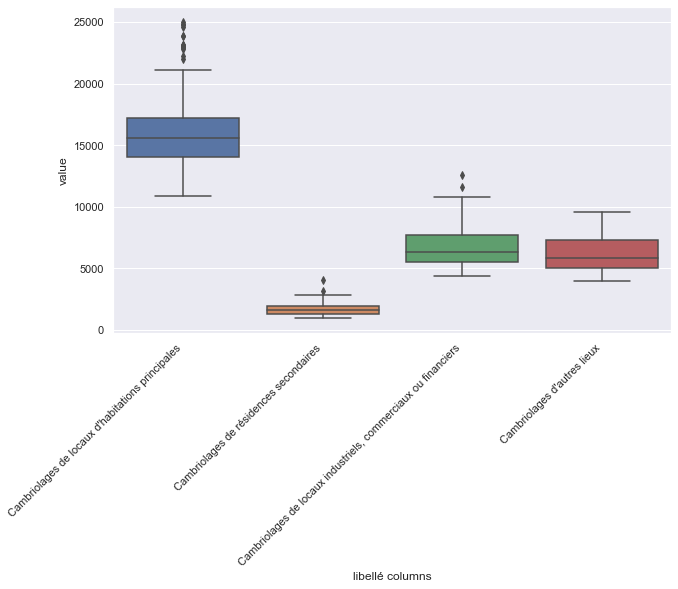

In [34]:
fig, ax = plt.subplots(figsize = (10, 6))
sns.boxplot(x="libellé columns", y="value", data=pd.melt(df[cambriolage_columns]))

#orient="h",
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

Il est clair que les cambriolages des résidences principales occupent la major partie des cambriolages en France. Aussi visualisation le graphique associé.

C:\Users\gjeanner\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


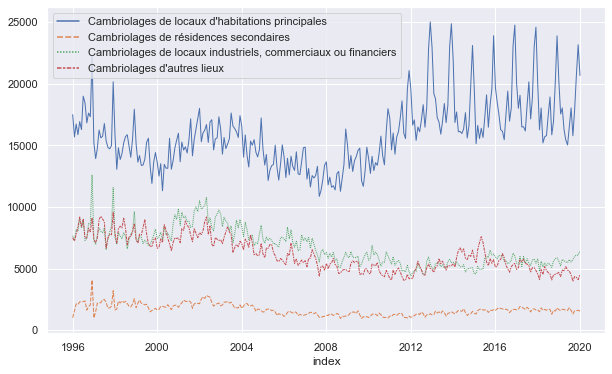

In [35]:
fig, ax = plt.subplots(figsize = (10, 6))
sns.lineplot(data=df[cambriolage_columns], ax=ax, ci=int, linewidth=1)

Une tendance semble émerger depuis 2012 pour les cambriolages d'habitations principales. Aussi réduisons la période à partir de cette année

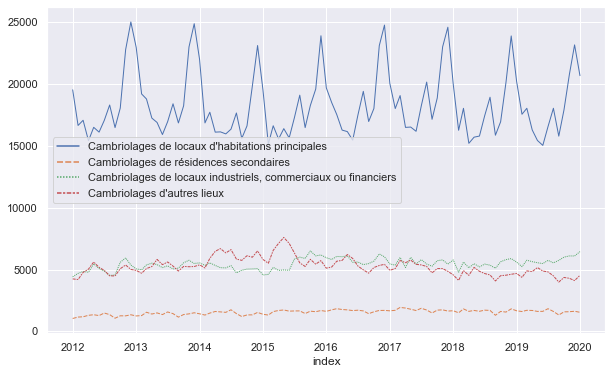

In [36]:
fig, ax = plt.subplots(figsize = (10, 6))
sns.lineplot(data=df.loc[:'2012-01-01',cambriolage_columns], ax=ax, linewidth=1)

La tenadance est bien confirmée. Maintenant regardons quand le pic de cambriolage des résidence principales se produit. Comparaons aussi les cambriolages de l'année 2019 avec la moyenne des cambriolages depuis 1996. Par an, combine avons nous en moyenne de cambriolage ?

libellé columns
Cambriolages de locaux d'habitations principales                 15934.0
Cambriolages de résidences secondaires                            1667.0
Cambriolages de locaux industriels, commerciaux ou financiers     6759.0
Cambriolages d'autres lieux                                       6164.0
dtype: float64


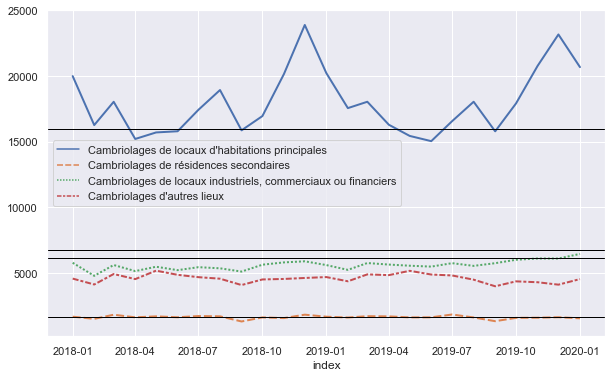

In [37]:
print(round(df[cambriolage_columns].mean(),0))

fig, ax = plt.subplots(figsize = (10, 6))
sns.lineplot(data=df.loc['2020-01-01':'2018-01-01',cambriolage_columns], ax=ax, linewidth=2)

for mean in df[cambriolage_columns].mean().values:
    ax.axhline(mean, ls='-', color='black', linewidth=1)

Nous pouvons constatés que seulement les résidences principales sont concernés par une augmentation du nombre de cambriolage vis-à-vis de leur moyenne depuis 1996. De plus les pics de cambriolages ne concerne visuellement que les habitations principales. Ces pics semble être focalisé sur les mois de novembre décembre, soit peu de temps avec Noël. Supposons que les autres types de cambriolages soit négligeables, regroupons donc pour continuer notre anlayse.

libellé columns  Cambriolages de locaux d'habitations principales  Autre
index                                                                   
2020-01-01                                                  20682  33197
2019-12-01                                                  23170  34991
2019-11-01                                                  20773  32746
2019-10-01                                                  17916  29849
2019-09-01                                                  15789  26832


C:\Users\gjeanner\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


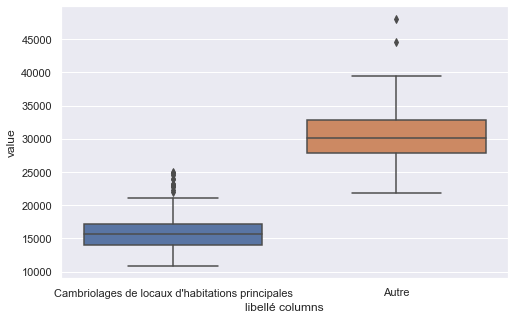

In [38]:
df_cambriolage=df[cambriolage_columns]
other_cambriolage_columns = [
    'Cambriolages de résidences secondaires',
    'Cambriolages de locaux industriels, commerciaux ou financiers',
    "Cambriolages d'autres lieux"
]
df_cambriolage["Autre"] = df_cambriolage[cambriolage_columns].sum(axis=1)
df_cambriolage = df_cambriolage.drop(columns=other_cambriolage_columns)
print(df_cambriolage.head(5))

fig, ax = plt.subplots(figsize = (8, 5))
sns.boxplot(x="libellé columns", y="value", data=pd.melt(df_cambriolage))

En les regroupant, nous pouvons constatés que les cambriolages de lieux n'étant pas des habitations principales représente une part plus significative du nombre de cambriolages.

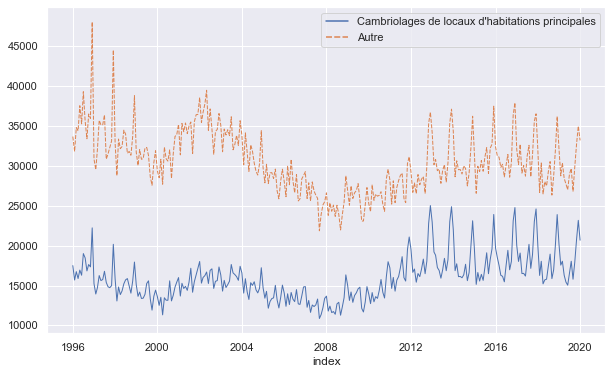

In [39]:
fig, ax = plt.subplots(figsize = (10, 6))
sns.lineplot(data=df_cambriolage, ax=ax, ci=int, linewidth=1)

En les visalisant, nous pouvons constatés que la tendance remarquée sur les pics de cambriolages sur les résidences principale est aussi représenté pour les cambriolages d'autre établissements. Nous pouvons en déduire qu'il y a une relation de corrélation entre depuis 2012 entre ces deux deux variables. Toutefois, il nous est impossible pour l'instant d'en déduire s'il s'agit d'une corrélation hasardeuse ou d'une relation de causalitée.

Est-ce que les cambriolages sont représentés dans le département possèdant le plus de crime ? <br> 

Cette question peut être répondu de deux manières. Soit par l'intermédiaire de nombre d'incident vis-à-vis des départements. Ou alors par le taux d'incident par personne par département. Ces deux approches se valent aussi étudions cette aspect dans les deux cas. <br>

Pour rappel, le département avec le plus d'incident est le 75 avec une moyenne de 24 465 incident par mois. Et le département 48 est celui avec le taux d'incident par personne le plus élévé, à savoir 35.04 % incident par personne.

In [40]:
# Restriction sur le département 75
df_cambriolage_2 = df_all.loc[df_all.departement == '75',cambriolage_columns]
df_cambriolage_2["Autre"] = df_cambriolage_2[cambriolage_columns].sum(axis=1)
df_cambriolage_2 = df_cambriolage_2.drop(columns=other_cambriolage_columns)
df_cambriolage_2.head()

libellé index,Cambriolages de locaux d'habitations principales,Autre
date,,
2020-01-01,1349,1999
2019-12-01,1046,1647
2019-11-01,904,1422
2019-10-01,971,1514
2019-09-01,999,1431


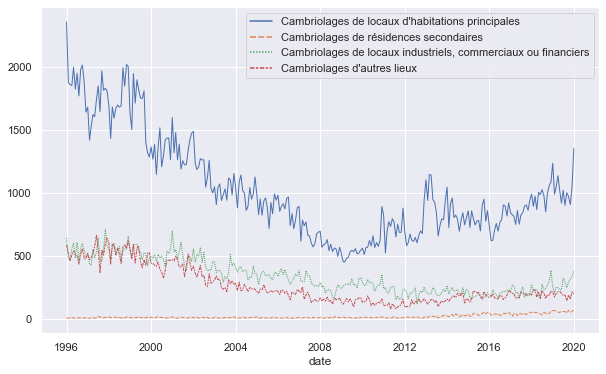

In [41]:
fig, ax = plt.subplots(figsize = (10, 6))
sns.lineplot(data=df_all.loc[df_all.departement == '75',cambriolage_columns], ax=ax, ci=int, linewidth=1)

En s'intéressant à ce graphique nous pouvons constaté que le nombre de cambriolage dans ce départementest suivait une tendance de diminution depuis 1996 mais que depuis 2009-2010, cette tendance c'est inversé en ayant un pic courant 2013. Regardons maintenant le département avec le taux d'incident le plus élevé.

In [42]:
df_cambriolage_3 = df_all.loc[df_all.departement == '48',cambriolage_columns]
df_cambriolage_3["Autre"] = df_cambriolage_3[cambriolage_columns].sum(axis=1)
df_cambriolage_3 = df_cambriolage_3.drop(columns=other_cambriolage_columns)
df_cambriolage_3.head()

libellé index,Cambriolages de locaux d'habitations principales,Autre
date,,
2020-01-01,4,25
2019-12-01,4,8
2019-11-01,6,18
2019-10-01,8,14
2019-09-01,3,12


Malgré un taux relativement élevé d'incident par personne, ce département ne possède pas un grand nombre d'observations concernant les cambriolages. Pour des raisons des granularités, il ne nous est pas intéressant d'étudier par comparaison les départements 48 et 75. 

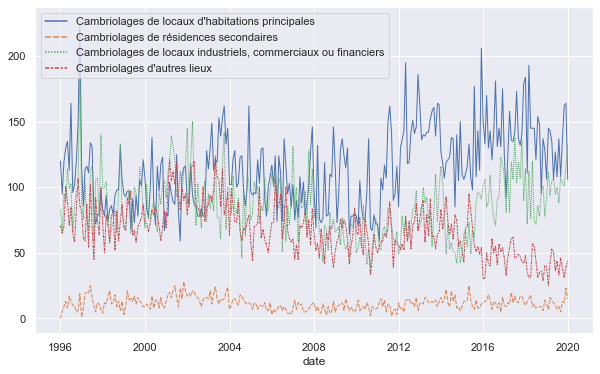

In [43]:
fig, ax = plt.subplots(figsize = (10, 6))
sns.lineplot(data=df_all.loc[df_all.departement == '49',cambriolage_columns], ax=ax, ci=int, linewidth=1)

fig, ax = plt.subplots(figsize = (10, 6))
sns.lineplot(data=df_cambriolage_2, ax=ax, ci=int, linewidth=1)

En résumé : 
- Entre 1996 et 2008, le nombre de cambriolage en France suivaient une tendance de diminution,
- depuis 2008, la tendance est repartie à la hausse,
- depuis 2012, les cambriolages manifestes des pics périodiques à l'approche de la période hivernale.

<a id='section2.2.2'></a>
#### *2.2.2. Homicides / murders*

Continuons avec l'axe homicide.

libellé columns,Homicides pour voler et à l'occasion de vols,Homicides pour d'autres motifs,Tentatives d'homicides pour voler et à l'occasion de vols,Tentatives homicides pour d'autres motifs,Homicides commis contre enfants de moins de 15 ans
count,289.00,289.00,289.00,289.00,289.00
mean,3.70,57.39,7.00,109.19,5.67
std,3.01,15.80,4.34,43.76,3.14
min,0.00,29.00,0.00,50.00,0.00
25%,2.00,47.00,4.00,82.00,3.00
50%,3.00,55.00,6.00,93.00,5.00
75%,5.00,65.00,9.00,123.00,7.00
max,16.00,170.00,26.00,250.00,20.00


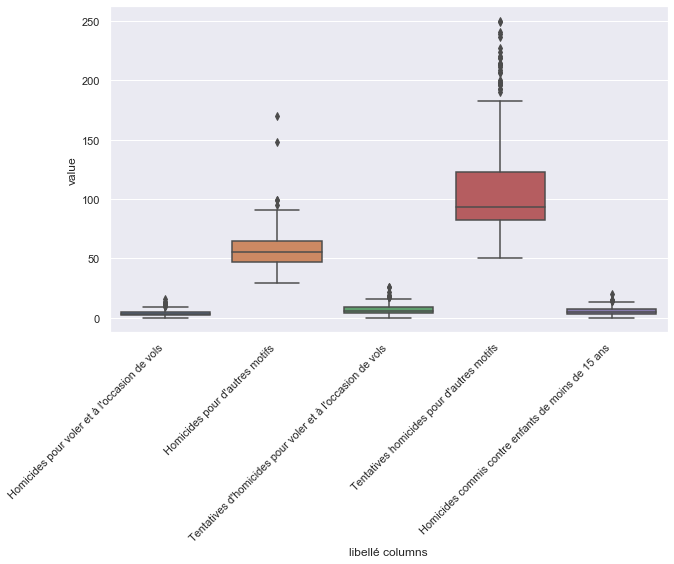

In [44]:
# Crimes and mesdemeanours concerning murders
homicides_columns = df.filter(regex=(".*[Hh]omicide?s.*")).columns.values

fig, ax = plt.subplots(figsize = (10, 6))
sns.boxplot(x="libellé columns", y="value", data=pd.melt(df[homicides_columns]))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

round(df[homicides_columns].describe(), 2)

Cet axe regroupe deux aspects, d'un côté les homicides et de l'autre les tentatives d'homicides. On remarque que l'immense majorité de ces cas représentes des homicides et tentatives d'homicides pour des raison autre que "pour voler", "à l'occasion de vols" ou "contre des enfants de moins de 15 ans".

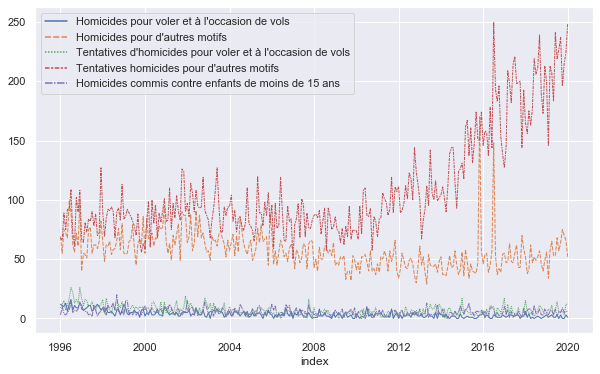

In [45]:
fig, ax = plt.subplots(figsize = (10, 6))
sns.lineplot(data=df[homicides_columns], ax=ax, ci=int, linewidth=1)

Cette visualisation est difficile à interpréter, pour plus de simplicité nous allons décomposer en homicide et tentative d'homicide. Nous pouvons constaté une tendance émergente pour les tentatives d'homicides pour d'autre raison depuis 2010. De plus, deux pics d'homicides sont représentés autour de l'année 2016.

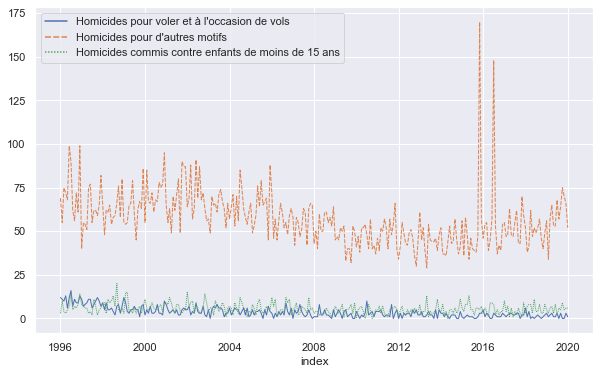

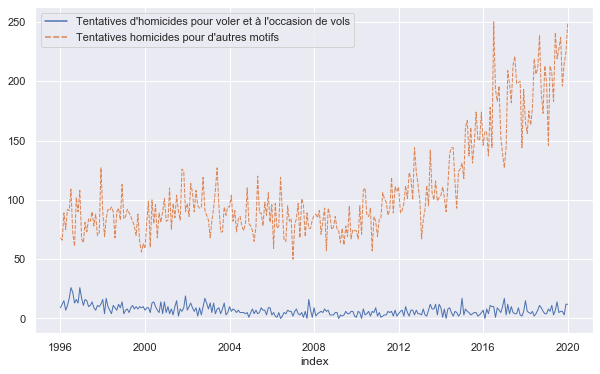

In [46]:
# Homicides
only_homicides_columns = df.filter(regex=(".*Homicides.*")).columns.values

fig, ax = plt.subplots(figsize = (10, 6))
sns.lineplot(data=df[only_homicides_columns], ax=ax, ci=int, linewidth=1)

# Tentatives
only_tentative_homicides_columns = df.filter(regex=(".*homicides.*")).columns.values

fig, ax = plt.subplots(figsize = (10, 6))
sns.lineplot(data=df[only_tentative_homicides_columns], ax=ax, ci=int, linewidth=1)

La tendance et ces pics sont plsu clair maintenant, focalisons nous sur les pics.

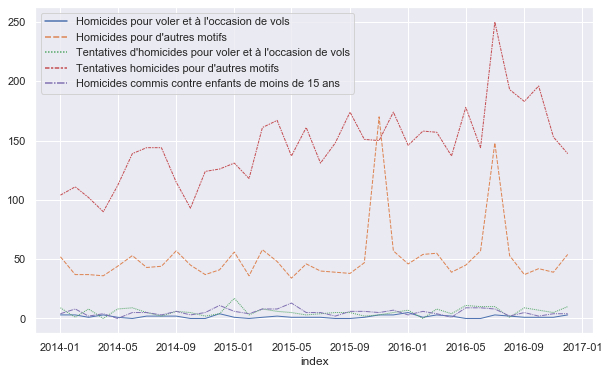

In [47]:
fig, ax = plt.subplots(figsize = (10, 6))
sns.lineplot(data=df.loc['2016':'2014',homicides_columns], ax=ax, linewidth=1)

libellé columns
Homicides pour voler et à l'occasion de vols                   4.0
Homicides pour d'autres motifs                                57.0
Tentatives d'homicides pour voler et à l'occasion de vols      7.0
Tentatives homicides pour d'autres motifs                    109.0
Homicides commis contre enfants de moins de 15 ans             6.0
dtype: float64


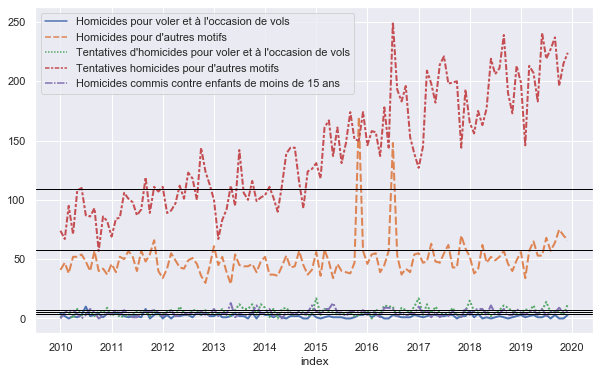

In [48]:
print(round(df[homicides_columns].mean(),0))

fig, ax = plt.subplots(figsize = (10, 6))
sns.lineplot(data=df.loc['2019':'2010',homicides_columns], ax=ax, linewidth=2)

for mean in df[homicides_columns].mean().values:
    ax.axhline(mean, ls='-', color='black', linewidth=1)

[Text(0, 0, "Homicides pour voler et à l'occasion de vols"),
 Text(0, 0, "Homicides pour d'autres motifs"),
 Text(0, 0, "Tentatives d'homicides pour voler et à l'occasion de vols"),
 Text(0, 0, "Tentatives homicides pour d'autres motifs"),
 Text(0, 0, 'Homicides commis contre enfants de moins de 15 ans')]

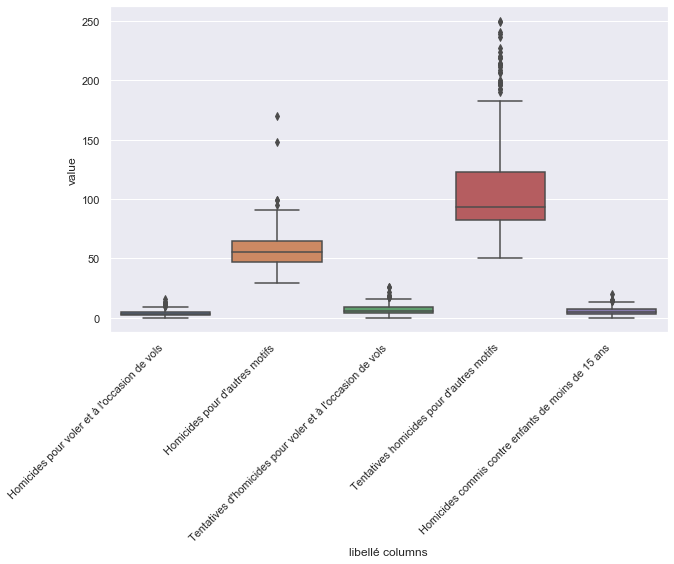

In [49]:
fig, ax = plt.subplots(figsize = (10, 6))
sns.boxplot(x="libellé columns", y="value", data=pd.melt(df[homicides_columns]))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

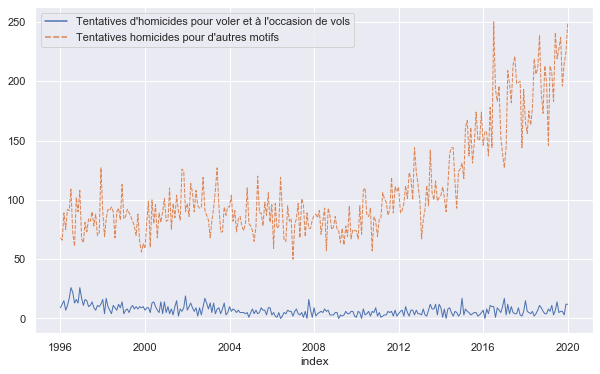

In [50]:
tentative_homicides_columns = df.filter(regex=(".*homicides.*")).columns.values

fig, ax = plt.subplots(figsize = (10, 6))
sns.lineplot(data=df[tentative_homicides_columns], ax=ax, ci=int, linewidth=1)

[Text(0, 0, "Tentatives d'homicides pour voler et à l'occasion de vols"),
 Text(0, 0, "Tentatives homicides pour d'autres motifs")]

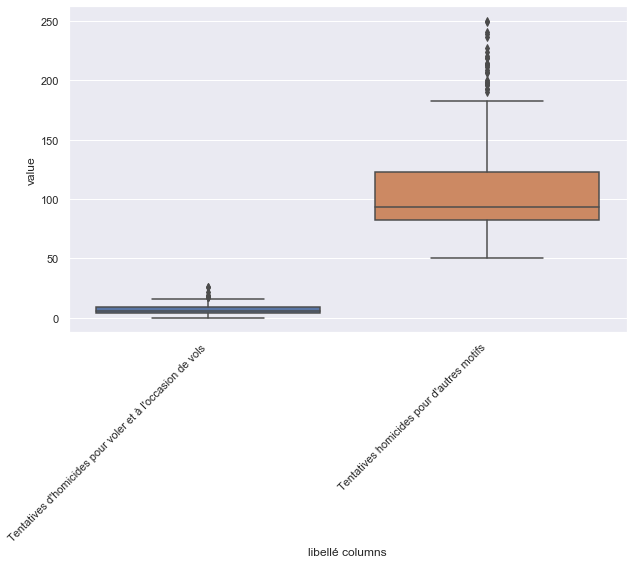

In [51]:
fig, ax = plt.subplots(figsize = (10, 6))
sns.boxplot(x="libellé columns", y="value", data=pd.melt(df[tentative_homicides_columns]))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

<a id='section2.2.3'></a>
#### *2.2.3. Vols / childrens*

In [52]:
voles_columns = df.filter(regex=(".*[Vv]ol?[es].*")).columns.values
# voles_columns = df.filter(regex=("Vols.*")).columns.values
voles_with_hands = df.filter(regex=(".*Vols à main.*")).columns.values



print(voles_columns.size)

print(voles_with_hands.size)


28
4


In [53]:
df.filter(regex=(".*[Vv]ol?[es].*")).columns.values

array(["Homicides pour voler et à l'occasion de vols",
       "Tentatives d'homicides pour voler et à l'occasion de vols",
       "Prises d'otages à l'occasion de vols",
       'Vols à main armée contre des établissements financiers',
       'Vols à main armée contre des éts industriels ou commerciaux',
       'Vols à main armée contre des entreprises de transports de fonds',
       'Vols à main armée contre des particuliers à leur domicile',
       'Autres vols à main armée',
       'Vols avec armes blanches contre des établissements financiers,commerciaux ou industriels',
       'Vols avec armes blanches contre des particuliers à leur domicile',
       'Autres vols avec armes blanches',
       'Vols violents sans arme contre des établissements financiers,commerciaux ou industriels',
       'Vols violents sans arme contre des particuliers à leur domicile',
       'Vols violents sans arme contre des femmes sur voie publique ou autre lieu public',
       "Vols violents sans arme contre 

In [54]:
df.filter(regex=(".*Vols à.*")).columns.values

array(['Vols à main armée contre des établissements financiers',
       'Vols à main armée contre des éts industriels ou commerciaux',
       'Vols à main armée contre des entreprises de transports de fonds',
       'Vols à main armée contre des particuliers à leur domicile',
       'Vols à la tire', "Vols à l'étalage", 'Vols à la roulotte'],
      dtype=object)

In [55]:
df.filter(regex=(".*Vols violents.*")).columns.values

array(['Vols violents sans arme contre des établissements financiers,commerciaux ou industriels',
       'Vols violents sans arme contre des particuliers à leur domicile',
       'Vols violents sans arme contre des femmes sur voie publique ou autre lieu public',
       "Vols violents sans arme contre d'autres victimes"], dtype=object)

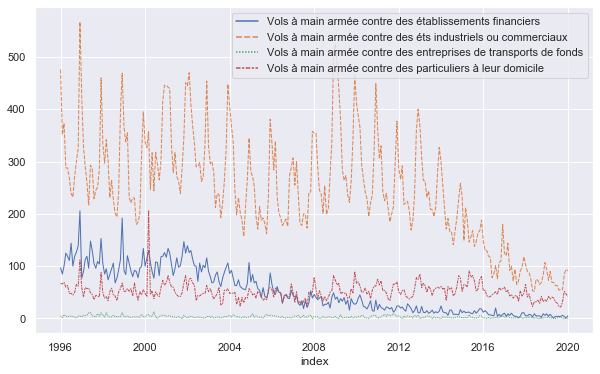

In [56]:
fig, ax = plt.subplots(figsize = (10, 6))
sns.lineplot(data=df[voles_with_hands], linewidth=1)

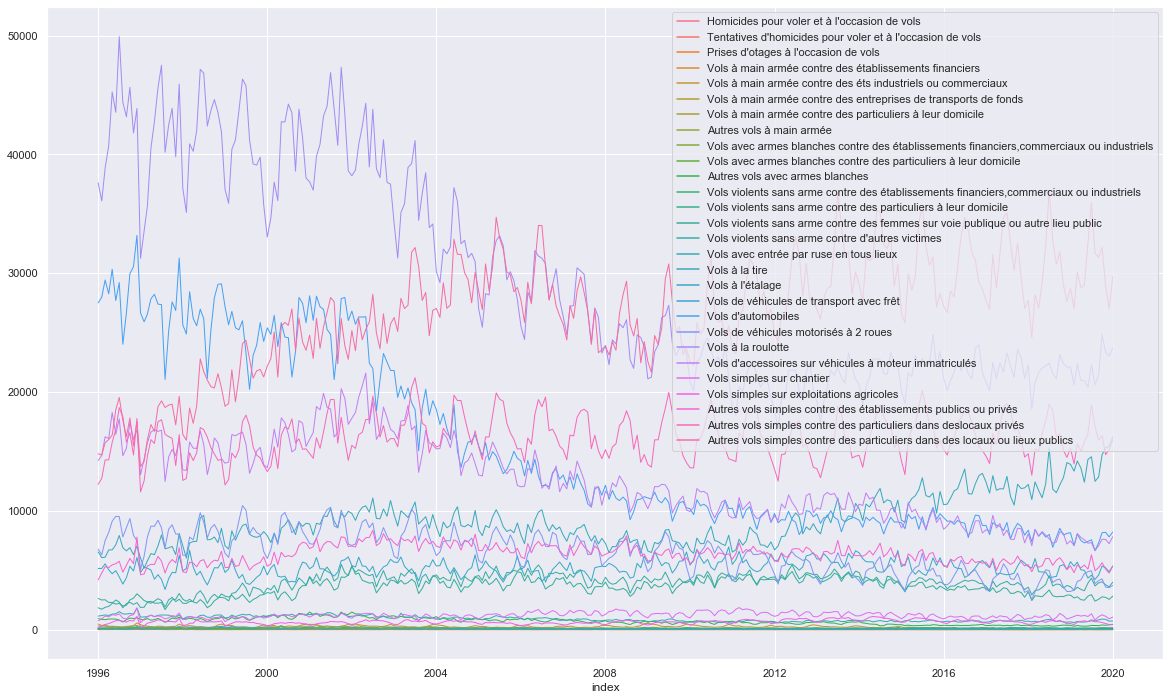

In [57]:
fig, ax = plt.subplots(figsize = (20, 12))

sns.lineplot(data=df[voles_columns], linewidth=1, dashes=False)

[Text(0, 0.5, 'count'), Text(0.5, 0, 'date'), Text(0.5, 1.0, 'Homicide plot')]

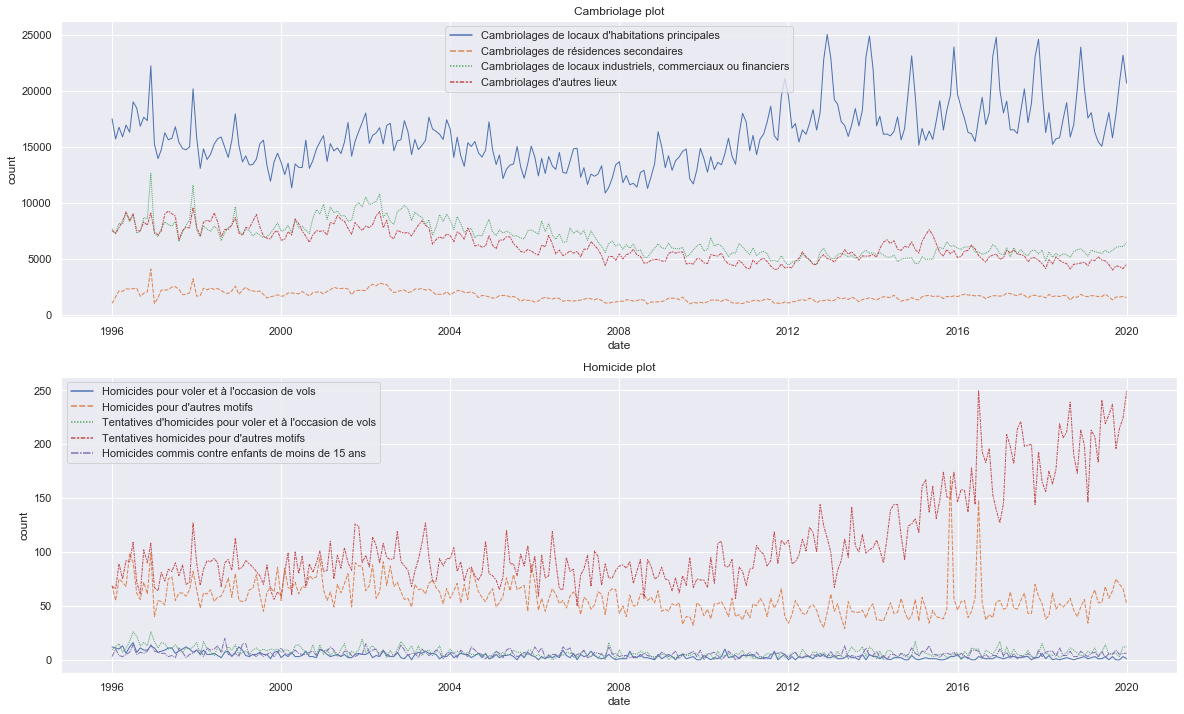

In [58]:
fig, ax = plt.subplots(figsize = (20, 12), nrows = 2)

sns.lineplot(data=df[cambriolage_columns], ax=ax[0], linewidth=1)
sns.lineplot(data=df[homicides_columns], ax=ax[1], linewidth=1)

ax[0].set(xlabel="date", ylabel="count", title="Cambriolage plot")
ax[1].set(xlabel="date", ylabel="count", title="Homicide plot")

In [59]:
columns = cambriolage_columns
# columns = np.append(cambriolage_columns, ['year','month'])
columns

array(["Cambriolages de locaux d'habitations principales",
       'Cambriolages de résidences secondaires',
       'Cambriolages de locaux industriels, commerciaux ou financiers',
       "Cambriolages d'autres lieux"], dtype=object)

In [60]:
df_tmp = df[columns]
df_tmp.describe()

libellé columns,Cambriolages de locaux d'habitations principales,Cambriolages de résidences secondaires,"Cambriolages de locaux industriels, commerciaux ou financiers",Cambriolages d'autres lieux
count,289.000000,289.000000,289.000000,289.000000
mean,15933.930796,1666.989619,6759.249135,6164.394464
std,2744.006441,439.440194,1482.474459,1375.318919
min,10865.000000,953.000000,4406.000000,3982.000000
25%,14048.000000,1326.000000,5545.000000,5032.000000
50%,15617.000000,1615.000000,6356.000000,5816.000000
75%,17193.000000,1939.000000,7715.000000,7301.000000
max,25024.000000,4076.000000,12615.000000,9583.000000


In [61]:
columns = cambriolage_columns

# columns = np.append(cambriolage_columns, ['year','month'])
col_tmp = np.append(columns, 'month')
df_tmp = df[col_tmp]
df_tmp = df_tmp.groupby("month").sum()
df_tmp


libellé columns,Cambriolages de locaux d'habitations principales,Cambriolages de résidences secondaires,"Cambriolages de locaux industriels, commerciaux ou financiers",Cambriolages d'autres lieux
month,,,,
01,432292,36497,170380,146997
02,354712,37709,155403,136699
03,377745,43395,170044,153208
04,347214,43136,162207,156724
05,357866,43144,167388,166896
06,354989,41998,159066,161570
07,380060,44551,161180,154714
08,402080,40858,148159,137744
09,354066,33352,149653,133679


In [62]:
df_tmp['sum']= df_tmp.iloc[:,0:columns.size].sum(axis=1)
df_tmp['mean']= df_tmp.iloc[:,0:columns.size].mean(axis=1)
df_tmp

libellé columns,Cambriolages de locaux d'habitations principales,Cambriolages de résidences secondaires,"Cambriolages de locaux industriels, commerciaux ou financiers",Cambriolages d'autres lieux,sum,mean
month,,,,,,
01,432292,36497,170380,146997,786166,196541.50
02,354712,37709,155403,136699,684523,171130.75
03,377745,43395,170044,153208,744392,186098.00
04,347214,43136,162207,156724,709281,177320.25
05,357866,43144,167388,166896,735294,183823.50
06,354989,41998,159066,161570,717623,179405.75
07,380060,44551,161180,154714,740505,185126.25
08,402080,40858,148159,137744,728841,182210.25
09,354066,33352,149653,133679,670750,167687.50


In [63]:
columns = cambriolage_columns

df_tmp = df[columns]
print(df_tmp.sum())
print(df_tmp.groupby("month").sum())
# df_tmp = df_tmp.groupby("month").sum()
df_tmp


libellé columns
Cambriolages de locaux d'habitations principales                 4604906
Cambriolages de résidences secondaires                            481760
Cambriolages de locaux industriels, commerciaux ou financiers    1953423
Cambriolages d'autres lieux                                      1781510
dtype: int64


KeyError: 'month'

In [ ]:
df_tmp.reset_index()

In [ ]:

sns.factorplot(x='class', y='survival rate', hue='sex', data=df, kind='bar')

In [ ]:
fig, axes = plt.subplots(nrows = 2, ncols=2)
fig.set_size_inches(14,14)

sns.barplot(x="month", y="sum", data=df_tmp.reset_index(), ax=axes[0][0])
sns.barplot(x="month", y="mean", data=df_tmp.reset_index(), ax=axes[0][1])

axes[0][0].set(xlabel="year", ylabel="count", title="Count by year")
axes[0][1].set(xlabel="day", ylabel="count", title="Count by Day Of Month")



In [ ]:
[["count"]].mean().reset_index()
sns.barplot(x="day", y="count", data=data_train_day, ax=axes[0][1])

In [ ]:
df = df_tmp.groupby("month").sum().reset_index()
print(df)
#sns.barplot(x="month", y=columns, data=df)



In [ ]:
[["count"]].mean().reset_index()
sns.barplot(x="day", y="count", data=data_train_day, ax=axes[0][1])

In [ ]:
column


In [ ]:
sns.set(color_codes=True)
iris = sns.load_dataset("iris")
sns.pairplot(iris);


In [ ]:
df_tmp.columns.values


In [ ]:
df1 = df_tmp.rename(
    columns = {
        "Cambriolages de locaux d'habitations principales":"Hab principale",
        'Cambriolages de résidences secondaires':"Res second",
        'Cambriolages de locaux industriels, commerciaux ou financiers': "locaux indus",
        "Cambriolages d'autres lieux":"autre"
    }
)
df1.head()
sns.pairplot(df1, hue="year");

In [ ]:
sns.catplot

In [ ]:
titanic.head()

In [ ]:
import seaborn as sns
sns.set(style="whitegrid")

# Load the example Titanic dataset
titanic = sns.load_dataset("titanic")

# Draw a nested barplot to show survival for class and sex
g = sns.catplot(x="class", y="survived", hue="sex", data=titanic,
                height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("survival probability")

In [ ]:
df1 = df_tmp.groupby(['month']).sum()
del df1['year']


data_train_day = data_train.groupby("day")[["count"]].mean().reset_index()
sns.barplot(x="day", y="count", data=data_train_day, ax=axes[0][1])

sns.pairplot(df_tmp, hue="month");

In [ ]:
df_tmp.groupby(['year']).sum()